# Machine Learning Essentials - Summer Semester 2024 // Exercise 05

## Team-Member
### 1. Sushmitha Chandrakumar - 4732591
### 2. Aarohi Verma - 4742978
### 3. Colin Fredynand - 4730221

# Task 3.1

In [5]:
import numpy as np

In [6]:
def omp_regression(X, y, T):
    N, D = X.shape
    solutions = np.zeros((D, T))
    A = set()
    B = set(range(D))
    r = y.copy()

    for t in range(T):
        if not B:
            break
        correlations = [(j, abs(np.dot(X[:, j], r))) for j in B]
        j_t = max(correlations, key=lambda x: x[1])[0]
        A.add(j_t)
        B.remove(j_t)
        X_t = X[:, list(A)]
        beta_t = np.linalg.lstsq(X_t, y, rcond=None)[0]
        r = y - np.dot(X_t, beta_t)
        solutions[list(A), t] = beta_t

    return solutions

# Task 3.2

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Number of pixels for acceptable error rates: 2


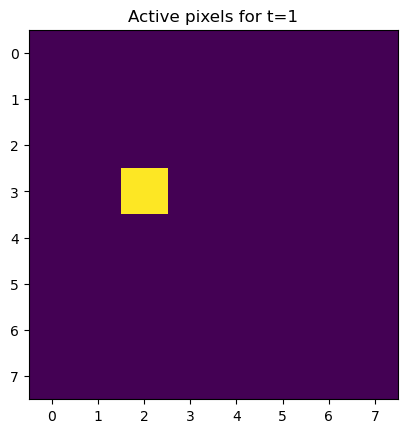

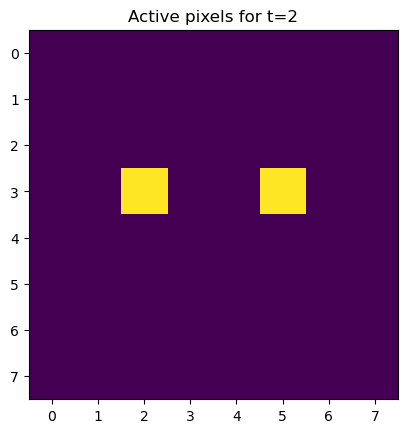

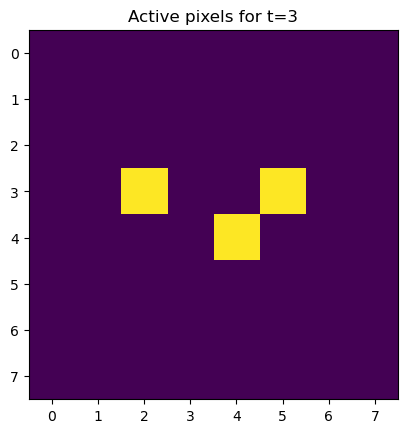

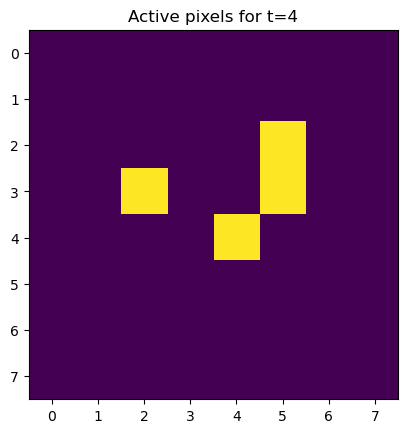

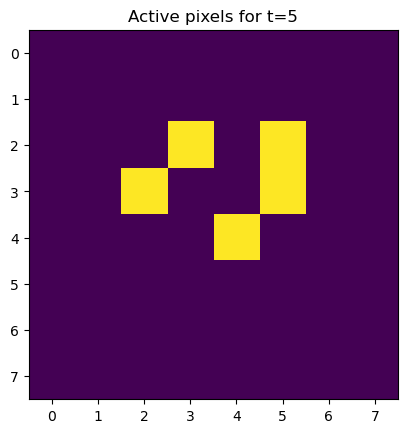

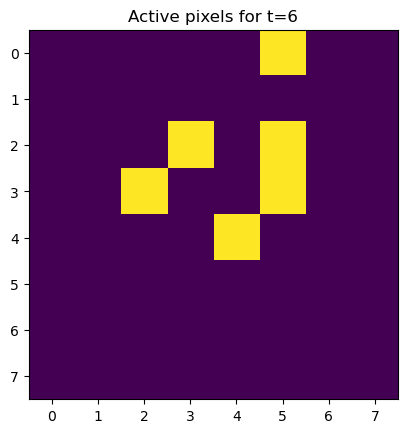

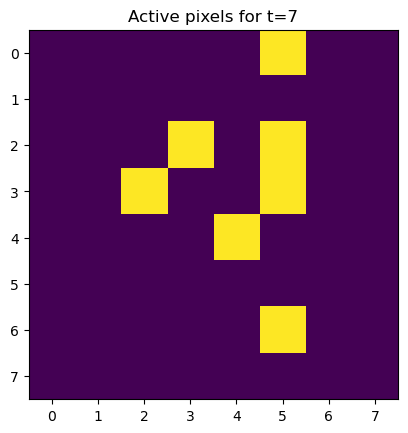

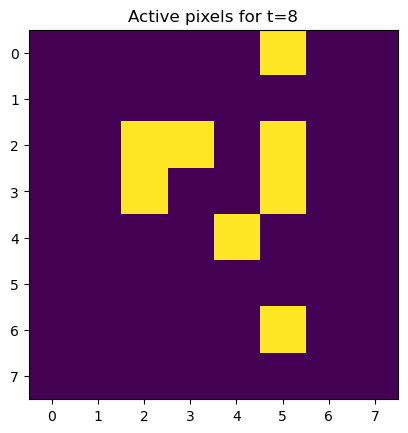

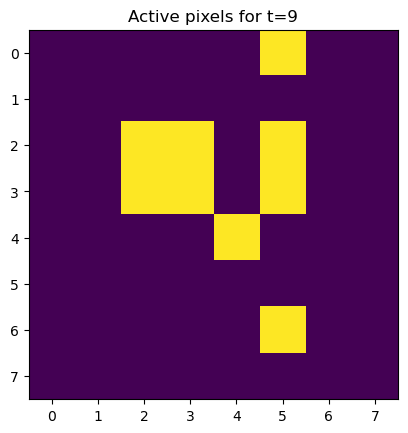

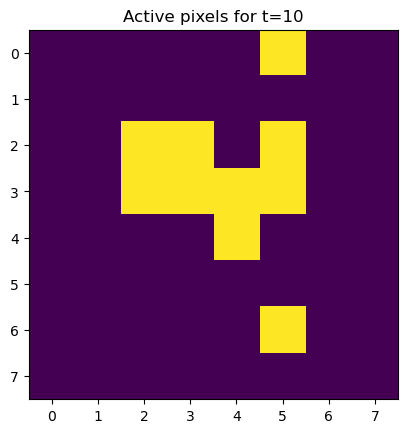

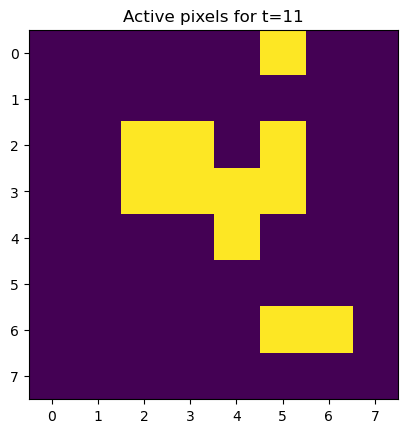

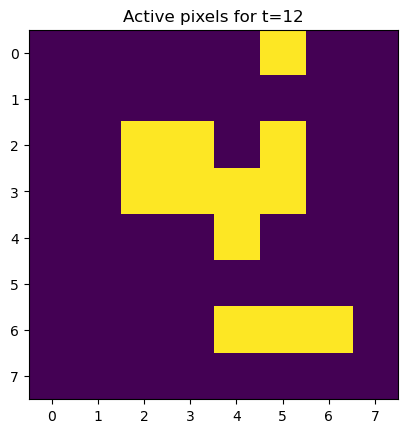

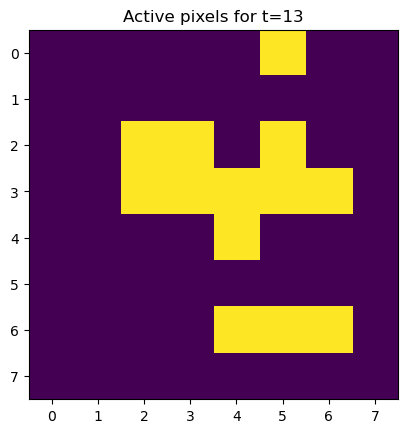

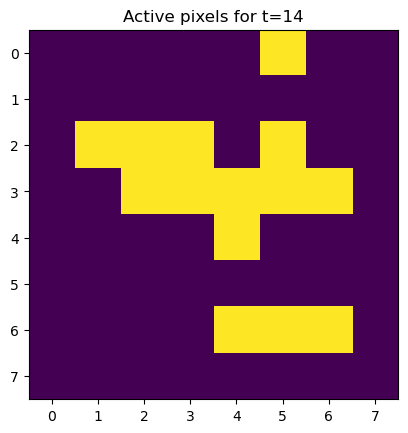

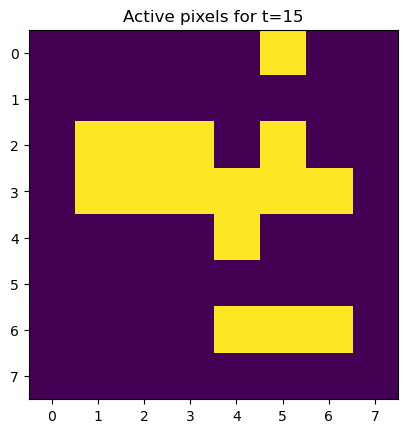

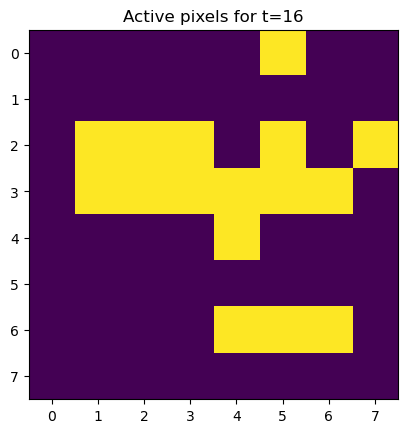

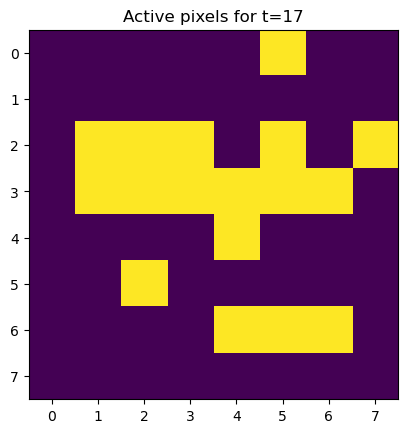

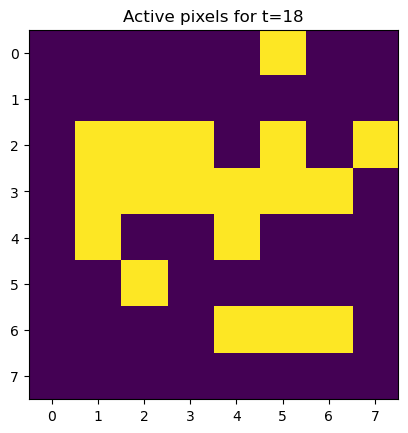

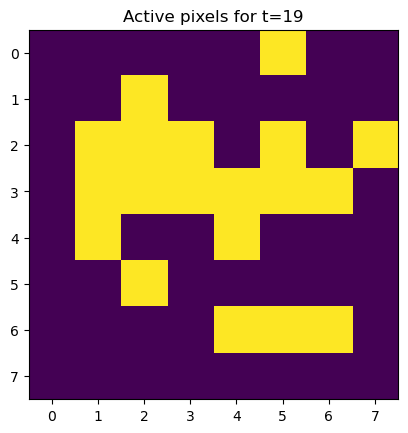

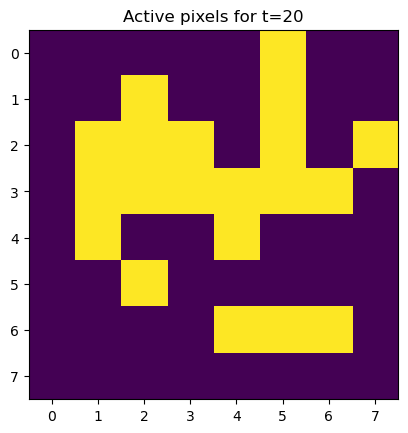

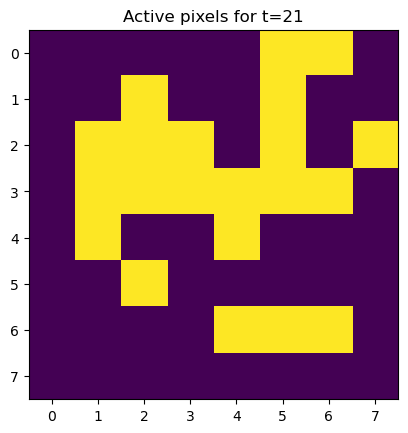

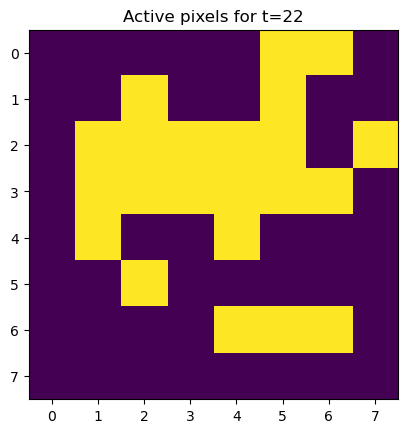

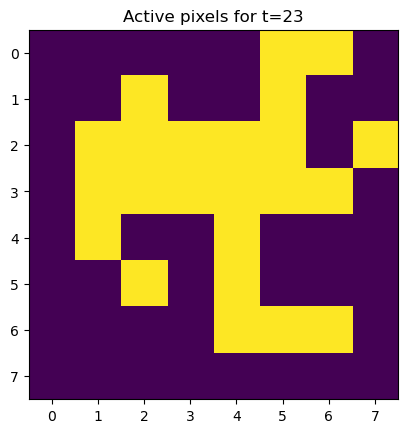

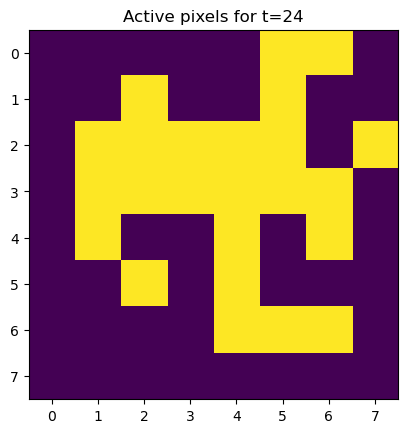

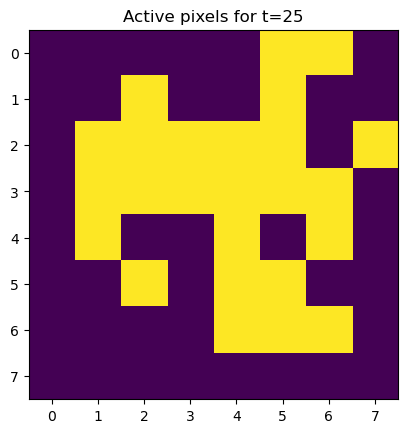

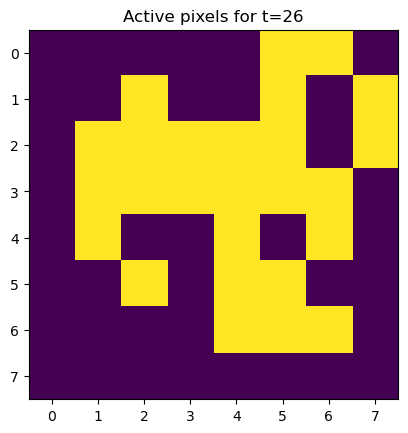

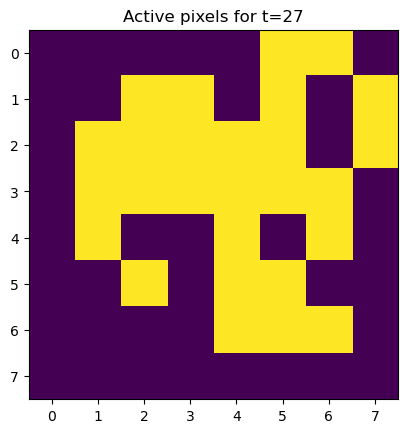

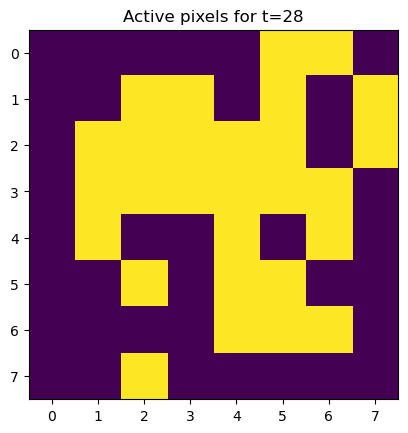

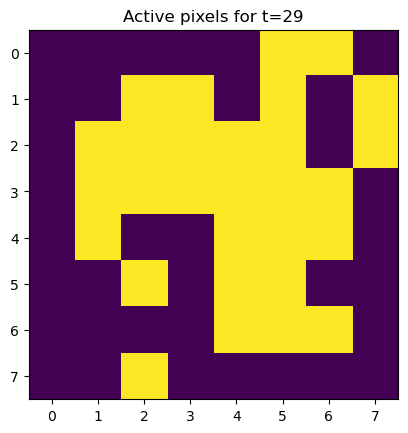

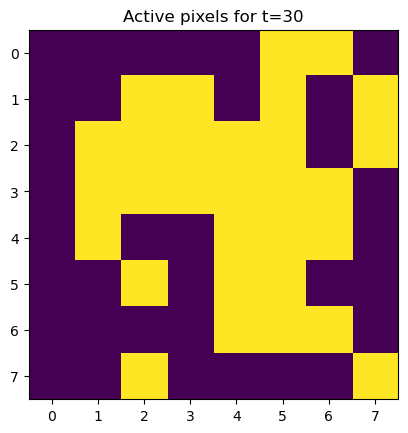

In [9]:
# Load the digits dataset
digits = load_digits()
X = digits.images
y = digits.target

# Flatten the images
X = X.reshape((X.shape[0], -1))

# Create the target vector with 1 for digit 3 and -1 for digit 9
y = np.where(y == 3, 1, np.where(y == 9, -1, 0))

# Remove other digits
mask = y != 0
X = X[mask]
y = y[mask]

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Execute omp_regression
T = 30
solutions = omp_regression(X_train, y_train, T)

# Calculate the error rate for each t
error_rates = []
for t in range(T):
    beta = solutions[:, t]
    y_pred = np.sign(X_test @ beta)
    error_rate = np.mean(y_test != y_pred)
    error_rates.append(error_rate)

# Determine the number of pixels for acceptable error rates
acceptable_error_rate = 0.09
acceptable_t = next(t for t, error_rate in enumerate(error_rates) if error_rate <= acceptable_error_rate)
print(f"Number of pixels for acceptable error rates: {acceptable_t}")

# Visualize the active pixels
for t in range(T):
    beta = solutions[:, t]
    active_pixels = beta != 0

    active_pixels_image = active_pixels.reshape(8, 8)

    # Create a new figure for each t
    plt.figure()
    plt.imshow(active_pixels_image, cmap='viridis', interpolation='nearest')
    plt.title(f'Active pixels for t={t+1}')
    plt.show()